In [19]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
from statsmodels.tsa import stattools

# load data

In [20]:
data = sio.loadmat('MSFT_20141103.mat')

In [32]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3#time in seconds, measured from NASDAQ opening at 9:30am
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
nMO = np.array(LOB['NumberMO'][0][0]*1.0)#total number of MOs submitted in the given 0.1 second interval
vMO = np.array(LOB['VolumeMO'][0][0]*1.0)#total volume of MOs submitted in the given 0.1 second interval
MO=np.array(LOB['MO'][0][0]*1.0)#information about market orders
dt = t[1]-t[0]
print(dt)
print(t[0:10])
print(len(t))
print(len(bid[:,0]))
print(t[-1])

# print(bid[:,0])
# print(ask)
print(vMO)

0.1
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
234000
234000
23400.0
[[4242. 1201.]
 [2726.  400.]
 [ 748.    0.]
 ...
 [   0.    0.]
 [   0.    0.]
 [   0.  107.]]


In [18]:
print(len(t))
print(np.shape(MO))

234000
(7981, 50)


# LOB

23400
[1300. 2947. 2661. 4297. 3403. 4129. 2971. 2506. 1206. 2500.  100. 1200.
   50.  800.  253.  100. 2550. 4833. 1800.  150.]
[1600. 5571. 2398. 2770. 2606. 2200. 1600. 6800.  400. 1000.  330. 6607.
  800. 1100.  920. 2164.  200. 1880.  260. 2785.]


<function matplotlib.pyplot.show>

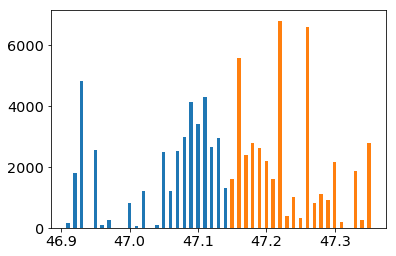

In [4]:
tcur = 10*60*39
print(tcur)
print(bidvol[tcur,:])
print(askvol[tcur,:])
plt.bar(bid[tcur,:],bidvol[tcur,:],width=0.005)
plt.bar(ask[tcur,:],askvol[tcur,:],width=0.005)
plt.show

[1. 0.]
[300.   0.]


<function matplotlib.pyplot.show>

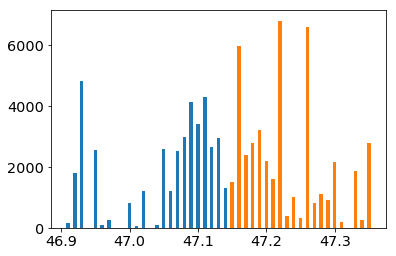

In [5]:
print(nMO[tcur])
print(vMO[tcur])
#print(nMO[tcur+1])
#print(vMO[tcur+1])
plt.bar(bid[tcur+1,:],bidvol[tcur+1,:],width=0.005)
plt.bar(ask[tcur+1,:],askvol[tcur+1,:],width=0.005)
plt.show

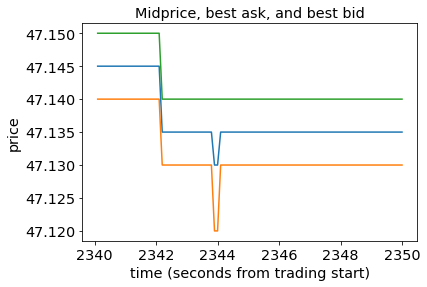

In [6]:
midprice = 0.5*(bid[:,0]+ask[:,0])
spread = ask[:,0]-bid[:,0]
plt.plot(t[tcur:(tcur+100)],midprice[tcur:(tcur+100)])
plt.plot(t[tcur:(tcur+100)],bid[tcur:(tcur+100),0])
plt.plot(t[tcur:(tcur+100)],ask[tcur:(tcur+100),0])
plt.title('Midprice, best ask, and best bid')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

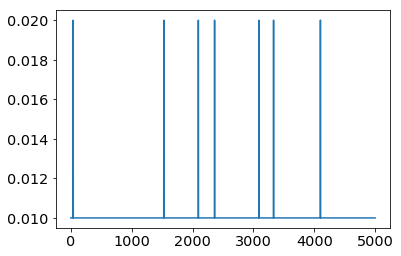

In [7]:
plt.plot(spread[tcur:(tcur+5000)])

In [8]:
print(vMO[tcur:(tcur+25)])
print([np.sum(bidvol[i,:]) for i in range(tcur,tcur+25)])
#print(askvol[tcur+1,:]-askvol[tcur,:])
print([np.sum(askvol[i,:]) for i in range(tcur,tcur+25)])

[[300.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0. 206.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]]
[39756.0, 39856.0, 39856.0, 39556.0, 39026.0, 39026.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38926.0, 38226.0, 38026.0, 38026.0, 38426.0]
[43991.0, 44891.0, 44691.0, 44591.0, 44379.0, 44379.0, 44379.0, 44179.0, 44179.0, 43979.0, 44079.0, 44079.0, 44079.0, 44079.0, 44079.0, 44079.0, 44079.0, 44079.0, 44079.0, 44079.0, 43979.0, 43095.0, 43095.0, 42795.0, 42695.0]


4782.0


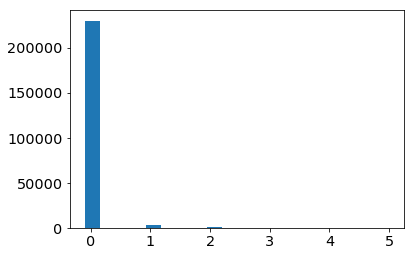

In [11]:
plt.hist(nMO[:,0]+nMO[:,1],20,(-0.1,5))
print(np.sum(nMO[:,0]))

4782.0


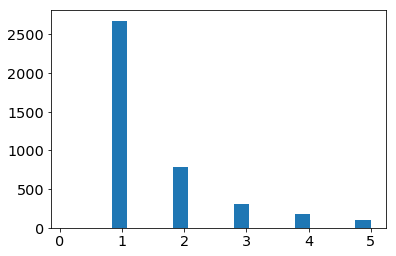

In [12]:
plt.hist(nMO[:,0]+nMO[:,1],20,(0.1,5))
print(np.sum(nMO[:,0]))

# Market Orders

In [13]:
print(len(MO))
print((MO[0,0]-3600000*9.5)*1e-3)#time from exchange opening, in seconds
print((MO[100:110,0]-3600000*9.5)*1e-3)#time from exchange opening, in seconds
print(MO[100:110,1]*1e-4)#best bid price
print(MO[100:110,2]*1e-4)#best ask price
print(MO[100:110,6])#volume of MO
print(MO[100:110,7])#type of MO (-1=buy +1=sell)
print(MO[100:110,3])#volume at best bid price
print(MO[100:110,4])#volume at best ask price

7981
-4422.693
[2.926 3.883 3.933 4.096 4.204 4.601 4.702 4.704 4.904 5.078]
[46.76 46.76 46.76 46.76 46.76 46.76 46.76 46.76 46.76 46.76]
[46.79 46.78 46.78 46.78 46.79 46.79 46.79 46.79 46.78 46.78]
[ 475. 1100. 2000.  300.  100.  300.  600.  400.  200.  200.]
[-1. -1.  1. -1.  1.  1.  1.  1.  1. -1.]
[10400. 10000. 10200.  8200.  8400.  7900.  7600.  7000.  6600.  6400.]
[ 949. 1100.  300.  300.  100. 1500. 1500. 1500.  200.  200.]


(array([5., 8., 2., 8., 3., 3., 2., 4., 4., 0., 3., 4., 2., 1., 2., 3., 5.,
        4., 6., 0., 0., 4., 5., 5., 4., 5., 5., 3., 5., 0., 1., 3., 2., 2.,
        3., 1., 4., 6., 4., 0., 1., 6., 3., 3., 0., 2., 4., 2., 0., 0., 7.,
        2., 3., 5., 4., 4., 1., 3., 5., 0., 2., 2., 1., 1., 3., 3., 2., 1.,
        5., 0., 3., 0., 3., 2., 1., 2., 1., 1., 4., 0., 0., 3., 5., 5., 1.,
        3., 1., 1., 3., 0., 2., 4., 1., 2., 1., 1., 0., 1., 4., 0., 4., 5.,
        4., 4., 4., 1., 2., 1., 0., 0., 6., 2., 2., 0., 1., 2., 2., 0., 1.,
        0., 1., 2., 3., 3., 4., 2., 0., 2., 5., 0., 0., 2., 3., 1., 2., 2.,
        2., 1., 0., 0., 4., 1., 2., 3., 0., 2., 2., 3., 1., 0., 1., 2., 0.,
        1., 3., 2., 1., 0., 0., 0., 1., 0., 2., 1., 0., 1., 0., 1., 0., 0.,
        2., 3., 3., 0., 5., 2., 2., 0., 1., 0., 0., 0., 1., 4., 3., 1., 3.,
        2., 0., 0., 0., 6., 1., 4., 2., 2., 3., 1., 5., 0., 1., 1., 2., 4.,
        0., 0., 3., 1., 4., 0., 2., 1., 1., 3., 3., 4., 1., 1., 1., 0., 2.,
        1., 

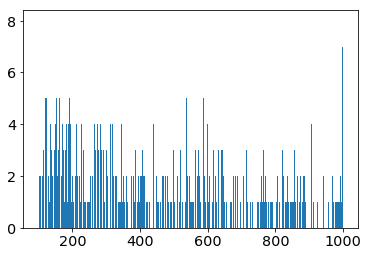

In [16]:
plt.hist(np.diff(MO[:,0]),1000,(100,1000))